Premier league players stats 2021-2022 season

Credit for the data: Azmine Toushik Wasi

Link to the data: https://www.kaggle.com/datasets/azminetoushikwasi/epl-21-22-matches-players?select=all_players_stats.csv

In this analysis we wil be looking a players stats from Premire league for the 2021-2022 season.


Packages we will be using 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.graph_objects as go

Loading the Data

In [3]:
players_stats = pd.read_csv('premier-league-player-stat-2021-2022.csv')
players_stats.head()

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0


TOP 10 players with the most goals

In [4]:
goals = players_stats[['Player', 'Goals']]
top_10_goal_scorer = goals.nlargest(n=10, columns =['Goals'])
top_10_goal_scorer

,Player,Goals
341,Mohamed Salah,31
514,Harry Kane,27
367,Riyad Mahrez,24
407,Cristiano Ronaldo,24
511,SON Heung-min,24
331,Sadio Mané,23
317,Diogo Jota,21
351,Kevin De Bruyne,19
296,James Maddison,18
572,Jarrod Bowen,18


In [5]:
top_10_goals_bar = px.bar(top_10_goal_scorer, y = 'Goals', x = 'Player', text_auto='.2s', 
                                              title= "Top 10 Goal Scorer")
top_10_goals_bar.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
top_10_goals_bar.show()

Here we can see the top ten goal scorer. We can see that Mohamed Salah is the top scorer.

Top 10 players with the most penalties

In [6]:
penalties = players_stats[['Player', 'Penalties']]
top_10_penalties = penalties.nlargest(n=10, columns =['Penalties'])
top_10_penalties

,Player,Penalties
167,Jorginho,9
367,Riyad Mahrez,7
69,Ivan Toney,6
341,Mohamed Salah,6
213,Wilfried Zaha,5
499,James Ward-Prowse,5
273,Raphinha,4
514,Harry Kane,4
10,Alexandre Lacazette,3
244,Richarlison,3


In [7]:
top_10_penalties_bar = px.bar(top_10_penalties, y = 'Penalties' , x = 'Player', text_auto='.2s', 
                                              title= "Top 10 Penalties Makers")
top_10_penalties_bar.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
top_10_penalties_bar.show()

Top penalty taker maker is Jorginho

Positions with the most goals

In [8]:
players_stats.head()

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0


Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


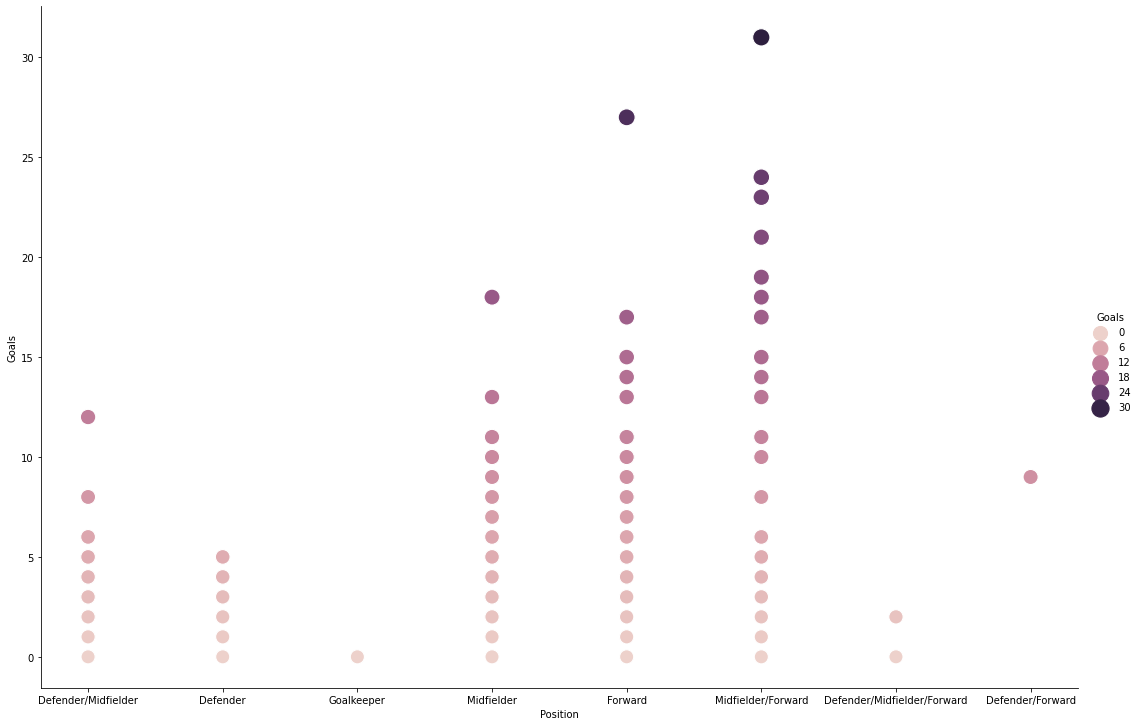

In [9]:
sns.relplot( x = players_stats['Position'], y = players_stats['Goals'], 
              size = players_stats['Goals'],
              hue = players_stats['Goals'],
              height = 10, 
              aspect= 1.5,
              sizes = (200,300))

We can see here that the position with the goals is Midfielder/Forward. We can also see in the data that therr are players who play multiple positons. And the position with the most goals is forward. 

Positions by Goals per Teams

In [10]:
fig = go.Figure(data=go.Heatmap(
        z= players_stats['Goals'],
        x= players_stats['Team'],
        y= players_stats['Position'],
        colorscale='Viridis'))

fig.update_layout(
    title='Positions by Goals per Teams',
    xaxis_nticks=400)

fig.show()

In this heatmap we can see positions by goals per teams. This is a interesting heatmap because we see that there are teams with most of there goals come from midfielder players like for example most goals from Southhampton come for a midfielder. Also, we can see that Burnley is that only team thats having a defeneder/Forward scoring goals.

Correlation between goals and apearances

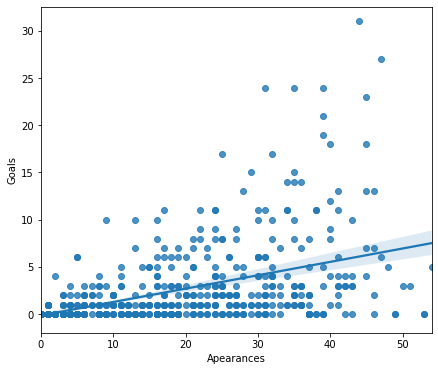

In [11]:
f, ax = plt.subplots(figsize=(7, 6))
sns.regplot(x= players_stats['Apearances'], y= players_stats['Goals'], data=players_stats, ax=ax);

We can see here their is a correlation between goals and apearanaces. But we do have some outliers. 